In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

df = pd.read_csv('train_data.csv')
#df.head(10)

In [ ]:
df['Year Published']=2025 - df['Year Published']

In [ ]:
#работа с пропусками
print(df.shape)
df['ID'].fillna(0,inplace=True)
df['Year Published'].fillna(df['Year Published'].mean(), inplace=True)
df['Owned Users'].fillna(df['Owned Users'].mean(), inplace=True)
df['Mechanics'].fillna(df['Mechanics'].mode()[0], inplace=True)
df['Domains'].fillna(df['Domains'].mode()[0], inplace=True)
print(df.isna().sum())
print(df.shape)
print(df.dtypes)


(15257, 14)
ID                    0
Name                  0
Year Published        0
Min Players           0
Max Players           0
Play Time             0
Min Age               0
Users Rated           0
Rating Average        0
BGG Rank              0
Complexity Average    0
Owned Users           0
Mechanics             0
Domains               0
dtype: int64
(15257, 14)
ID                    float64
Name                   object
Year Published        float64
Min Players             int64
Max Players             int64
Play Time               int64
Min Age                 int64
Users Rated             int64
Rating Average         object
BGG Rank                int64
Complexity Average     object
Owned Users           float64
Mechanics              object
Domains                object
dtype: object


<ipython-input-3-8f5d665d767d>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ID'].fillna(0,inplace=True)
<ipython-input-3-8f5d665d767d>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: 

In [ ]:
df['Rating Average'] = df['Rating Average'].str.replace(",", ".")
df['Rating Average'] = pd.to_numeric(df['Rating Average'], errors='coerce')
df['Complexity Average'] = df['Complexity Average'].str.replace(",", ".")
df['Complexity Average'] = pd.to_numeric(df['Complexity Average'], errors='coerce')

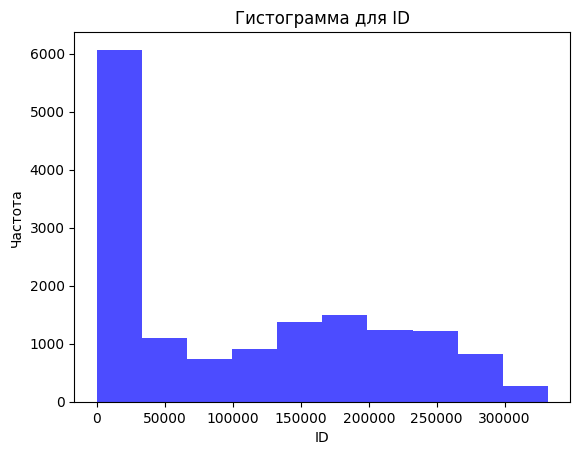

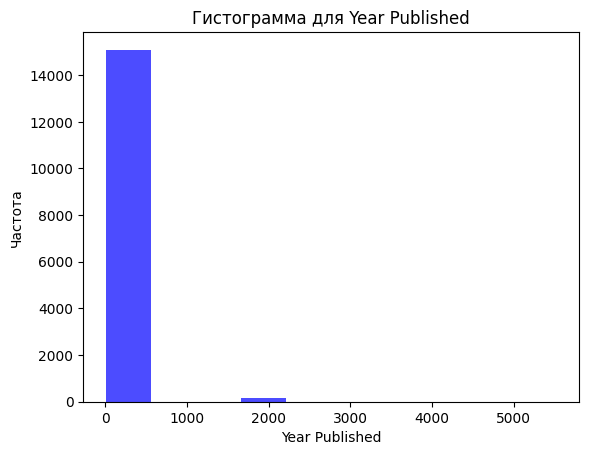

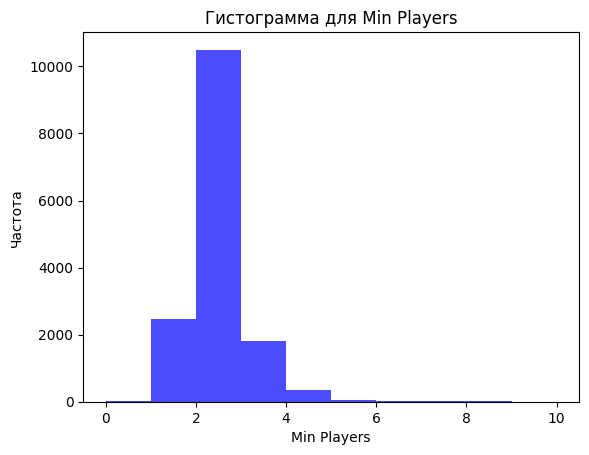

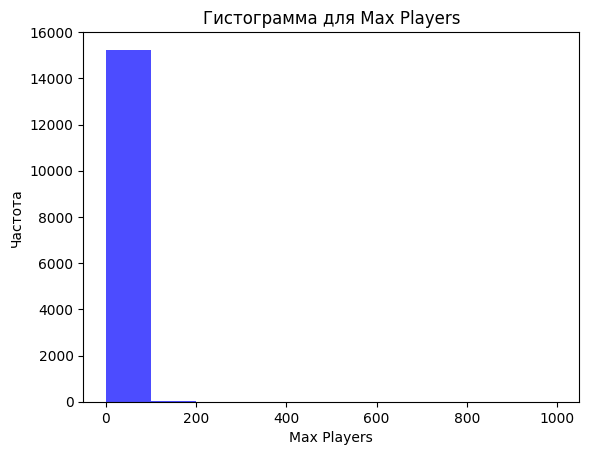

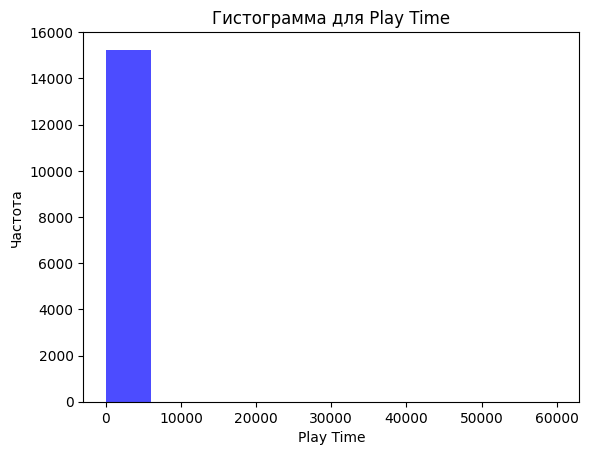

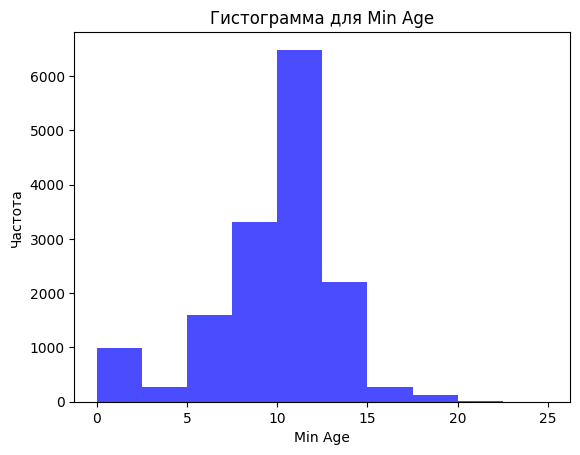

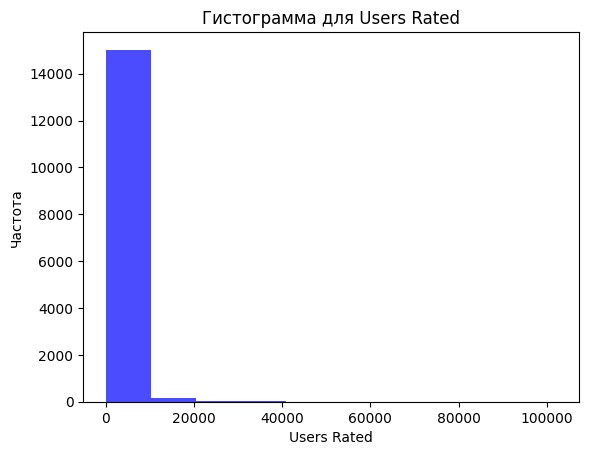

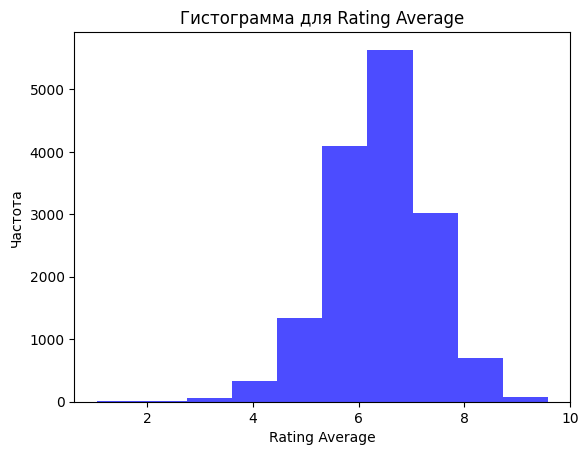

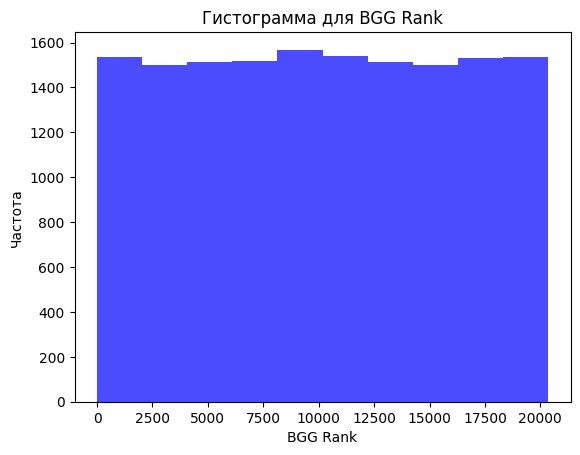

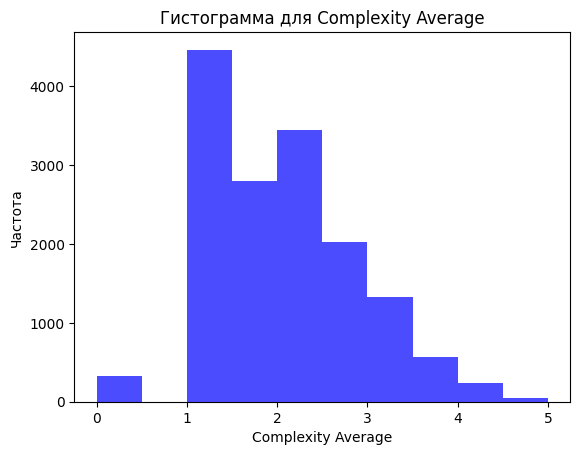

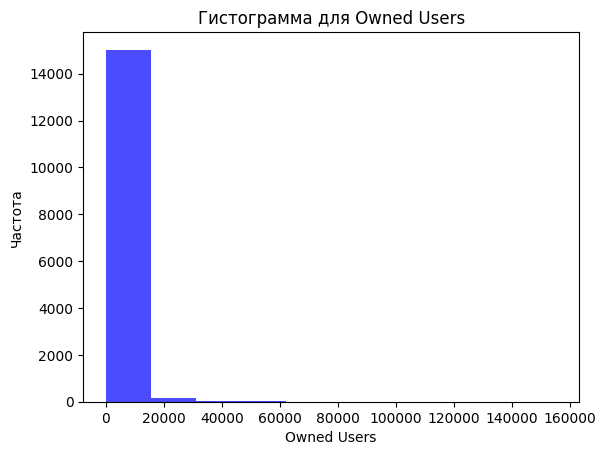

In [ ]:
numeric_cols = df.select_dtypes(include=['number']).columns

for col in numeric_cols:
    plt.figure()
    plt.hist(df[col], bins=10, alpha=0.7, color='blue')
    plt.title(f'Гистограмма для {col}')
    plt.xlabel(col)
    plt.ylabel('Частота')
    plt.show()

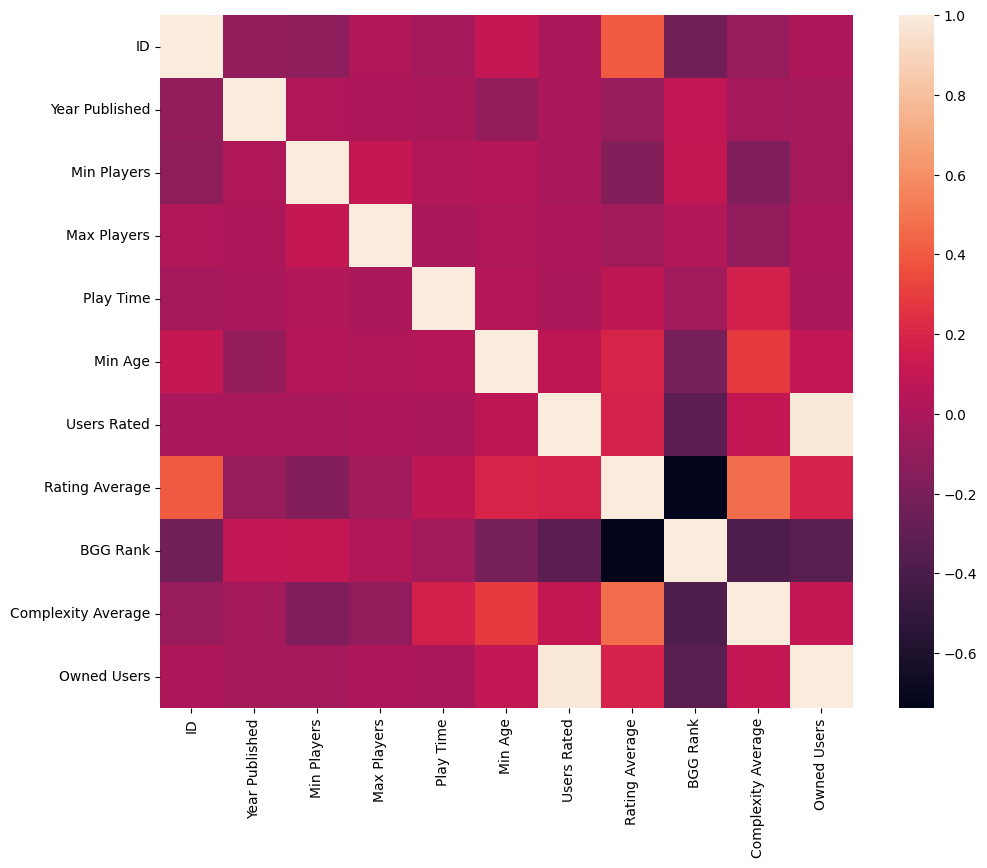

In [ ]:
corrmat = df.corr(numeric_only= True)
ig = plt.figure(figsize=(12, 9))

sns.heatmap(corrmat, square = True)
plt.show()

In [ ]:
mlb = MultiLabelBinarizer()
df['Mechanics'] = df['Mechanics'].str.replace("/", ", ")
df['Mechanics'] = df['Mechanics'].str.split(',')
m_encoded = mlb.fit_transform(df['Mechanics'])
m_df = pd.DataFrame(m_encoded, columns=mlb.classes_)
df = pd.concat([df, m_df], axis=1)

df['Domains'] = df['Domains'].str.split(',')
m_encoded = mlb.fit_transform(df['Domains'])
m_df = pd.DataFrame(m_encoded, columns=mlb.classes_)
df = pd.concat([df, m_df], axis=1)
df.drop(columns=['Domains', 'Mechanics'], inplace=True)

df.head()

,ID,Name,Year Published,Min Players,Max Players,Play Time,Min Age,Users Rated,Rating Average,BGG Rank,...,Thematic Games,Wargames,Abstract Games,Children's Games,Customizable Games,Family Games,Party Games,Strategy Games,Thematic Games,Wargames
0,174430.0,Gloomhaven,8.0,1,4,120,14,42055,8.79,1,...,1,0,0,0,0,0,0,1,0,0
1,224517.0,Brass: Birmingham,7.0,2,4,120,14,19217,8.66,3,...,0,0,0,0,0,0,0,1,0,0
2,167791.0,Terraforming Mars,9.0,1,5,120,12,64864,8.43,4,...,0,0,0,0,0,0,0,1,0,0
3,233078.0,Twilight Imperium: Fourth Edition,8.0,3,6,480,14,13468,8.70,5,...,1,0,0,0,0,0,0,1,0,0
4,291457.0,Gloomhaven: Jaws of the Lion,5.0,1,4,120,14,8392,8.87,6,...,1,0,0,0,0,0,0,1,0,0


In [ ]:
df_st = df.iloc[:, 12:]
print(df_st)
df_st.columns = df_st.columns.str.replace(" ", "")
df_st = df_st.groupby(level=0, axis=1).sum()
print(df_st.shape)
df_st.columns

         Battle Card Driven    Campaign Game    Combat Results Table  \
0                         1                1                       0   
1                         0                0                       0   
2                         0                0                       0   
3                         0                0                       0   
4                         1                1                       0   
...                     ...              ...                     ...   
15252                     0                0                       0   
15253                     0                0                       0   
15254                     0                0                       0   
15255                     0                0                       0   
15256                     0                0                       0   

         Influence    Mission     Paragraph    Solitaire Game  \
0                0           1            0                 1   
1    

<ipython-input-8-a0694e61c5c2>:4: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  df_st = df_st.groupby(level=0, axis=1).sum()


Index(['AbstractGames', 'Acting', 'Action', 'ActionDrafting', 'ActionPoints',
       'ActionQueue', 'ActionRetrieval', 'ActionTimer', 'AdvantageToken',
       'Alliances',
       ...
       'TurnOrder:Stat-Based', 'VariablePhaseOrder', 'VariablePlayerPowers',
       'VariableSet-up', 'VictoryPointsasaResource', 'Voting', 'Wargames',
       'WorkerPlacement', 'WorkerPlacementwithDiceWorkers', 'ZoneofControl'],
      dtype='object', length=202)

In [ ]:
df=df.iloc[:,:12]
df=pd.concat([df,df_st],axis=1)
df

,ID,Name,Year Published,Min Players,Max Players,Play Time,Min Age,Users Rated,Rating Average,BGG Rank,...,TurnOrder:Stat-Based,VariablePhaseOrder,VariablePlayerPowers,VariableSet-up,VictoryPointsasaResource,Voting,Wargames,WorkerPlacement,WorkerPlacementwithDiceWorkers,ZoneofControl
0,174430.0,Gloomhaven,8.0,1,4,120,14,42055,8.79,1,...,0,0,1,0,0,0,0,0,0,0
1,224517.0,Brass: Birmingham,7.0,2,4,120,14,19217,8.66,3,...,1,0,0,1,0,0,0,0,0,0
2,167791.0,Terraforming Mars,9.0,1,5,120,12,64864,8.43,4,...,0,0,1,0,0,0,0,0,0,0
3,233078.0,Twilight Imperium: Fourth Edition,8.0,3,6,480,14,13468,8.70,5,...,0,1,1,0,0,1,0,0,0,0
4,291457.0,Gloomhaven: Jaws of the Lion,5.0,1,4,120,14,8392,8.87,6,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15252,1410.0,Trouble,60.0,2,4,45,4,3255,3.79,20339,...,0,0,0,0,0,0,0,0,0,0
15253,16398.0,War,2025.0,2,2,30,4,1340,2.28,20340,...,0,0,0,0,0,0,0,0,0,0
15254,5048.0,Candy Land,76.0,2,4,30,3,4006,3.18,20342,...,0,0,0,0,0,0,0,0,0,0
15255,5432.0,Chutes and Ladders,2225.0,2,6,30,3,3783,2.86,20343,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
print(df.dtypes)
df=pd.DataFrame(df)

ID                                float64
Name                               object
Year Published                    float64
Min Players                         int64
Max Players                         int64
                                   ...   
Voting                              int64
Wargames                            int64
WorkerPlacement                     int64
WorkerPlacementwithDiceWorkers      int64
ZoneofControl                       int64
Length: 214, dtype: object


In [ ]:
df.columns.get_loc('Rating Average')

8

In [ ]:
#разделение train
target_index = 8
columns_to_drop = [1]
X = df.drop(df.columns[columns_to_drop], axis=1).drop(df.columns[target_index], axis=1)
Y = df.iloc[:, target_index].values
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)
X

,ID,Year Published,Min Players,Max Players,Play Time,Min Age,Users Rated,BGG Rank,Complexity Average,Owned Users,...,TurnOrder:Stat-Based,VariablePhaseOrder,VariablePlayerPowers,VariableSet-up,VictoryPointsasaResource,Voting,Wargames,WorkerPlacement,WorkerPlacementwithDiceWorkers,ZoneofControl
0,174430.0,8.0,1,4,120,14,42055,1,3.86,68323.0,...,0,0,1,0,0,0,0,0,0,0
1,224517.0,7.0,2,4,120,14,19217,3,3.91,28785.0,...,1,0,0,1,0,0,0,0,0,0
2,167791.0,9.0,1,5,120,12,64864,4,3.24,87099.0,...,0,0,1,0,0,0,0,0,0,0
3,233078.0,8.0,3,6,480,14,13468,5,4.22,16831.0,...,0,1,1,0,0,1,0,0,0,0
4,291457.0,5.0,1,4,120,14,8392,6,3.55,21609.0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15252,1410.0,60.0,2,4,45,4,3255,20339,1.05,4962.0,...,0,0,0,0,0,0,0,0,0,0
15253,16398.0,2025.0,2,2,30,4,1340,20340,1.00,427.0,...,0,0,0,0,0,0,0,0,0,0
15254,5048.0,76.0,2,4,30,3,4006,20342,1.08,5788.0,...,0,0,0,0,0,0,0,0,0,0
15255,5432.0,2225.0,2,6,30,3,3783,20343,1.02,4400.0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#обучение на части train
lig_reg = LinearRegression()
lig_reg.fit(X_train, y_train)
y_pred = lig_reg.predict(X_test)
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 score:', r2_score(y_test, y_pred))

Mean Absolute Error: 0.3659504616298404
Mean Squared Error: 0.25601762109987836
R2 score: 0.7039985196839009


In [ ]:
#чтение test
dfTest = pd.read_csv('test_data.csv')
dfTest.head(10)

,ID,Name,Year Published,Min Players,Max Players,Play Time,Min Age,Users Rated,BGG Rank,Complexity Average,Owned Users,Mechanics,Domains
0,161936.0,Pandemic Legacy: Season 1,2015.0,2,4,60,13,41643,2,"2,84",65294.0,"Action Points, Cooperative Game, Hand Manageme...","Strategy Games, Thematic Games"
1,12333.0,Twilight Struggle,2005.0,2,2,180,13,40814,10,"3,59",56219.0,"Action/Event, Advantage Token, Area Majority /...","Strategy Games, Wargames"
2,115746.0,War of the Ring: Second Edition,2012.0,2,4,180,13,13725,12,"4,14",22281.0,"Area Majority / Influence, Area Movement, Camp...","Thematic Games, Wargames"
3,169786.0,Scythe,2016.0,1,5,115,14,57871,14,"3,41",75640.0,"Area Majority / Influence, Card Play Conflict ...",Strategy Games
4,28720.0,Brass: Lancashire,2007.0,2,4,120,14,19400,19,"3,86",25429.0,"Hand Management, Income, Loans, Network and Ro...",Strategy Games
5,177736.0,A Feast for Odin,2016.0,1,4,120,12,17377,21,"3,84",22794.0,"Automatic Resource Growth, Dice Rolling, Grid ...",Strategy Games
6,167355.0,Nemesis,2018.0,1,5,180,12,12290,24,"3,35",17574.0,"Campaign / Battle Card Driven, Cooperative Gam...",Thematic Games
7,96848.0,Mage Knight Board Game,2011.0,1,4,240,14,27850,26,"4,31",39421.0,"Card Drafting, Cooperative Game, Deck Bag and ...","Strategy Games, Thematic Games"
8,237182.0,Root,2018.0,2,4,90,10,24412,27,"3,67",37715.0,"Action Queue, Action Retrieval, Area Majority ...","Strategy Games, Wargames"
9,276025.0,Maracaibo,2019.0,1,4,120,12,7645,37,"3,87",12042.0,"Contracts, End Game Bonuses, Events, Hand Mana...",Strategy Games


In [ ]:
#обработка test
print(dfTest.shape)
print(dfTest.isna().sum())

df['Year Published']=2025 - df['Year Published']

dfTest['ID'].fillna(0,inplace=True)
dfTest['Owned Users'].fillna(dfTest['Owned Users'].mean(), inplace=True)
dfTest['Mechanics'].fillna(dfTest['Mechanics'].mode()[0], inplace=True)
dfTest['Domains'].fillna(dfTest['Domains'].mode()[0], inplace=True)
print(dfTest.shape)
print(dfTest.isna().sum())

dfTest['Complexity Average'] = dfTest['Complexity Average'].str.replace(",", ".")
dfTest['Complexity Average'] = pd.to_numeric(dfTest['Complexity Average'], errors='coerce')
label_encoder = preprocessing.LabelEncoder()
dfTest['Mechanics'] = dfTest['Mechanics'].str.replace("/", ", ")
dfTest['Mechanics'] = dfTest['Mechanics'].str.split(',')
m_encoded = mlb.fit_transform(dfTest['Mechanics'])
m_df = pd.DataFrame(m_encoded, columns=mlb.classes_)
dfTest = pd.concat([dfTest, m_df], axis=1)
dfTest['Domains'] = dfTest['Domains'].str.split(',')
m_encoded = mlb.fit_transform(dfTest['Domains'])
m_df = pd.DataFrame(m_encoded, columns=mlb.classes_)
dfTest = pd.concat([dfTest, m_df], axis=1)
dfTest.drop(columns=['Domains', 'Mechanics'], inplace=True)

dfTest.head()

(5086, 13)
ID                       6
Name                     0
Year Published           0
Min Players              0
Max Players              0
Play Time                0
Min Age                  0
Users Rated              0
BGG Rank                 0
Complexity Average       0
Owned Users              6
Mechanics              398
Domains               2510
dtype: int64
(5086, 13)
ID                    0
Name                  0
Year Published        0
Min Players           0
Max Players           0
Play Time             0
Min Age               0
Users Rated           0
BGG Rank              0
Complexity Average    0
Owned Users           0
Mechanics             0
Domains               0
dtype: int64


<ipython-input-15-dc2448e81f92>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfTest['ID'].fillna(0,inplace=True)
<ipython-input-15-dc2448e81f92>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method(

,ID,Name,Year Published,Min Players,Max Players,Play Time,Min Age,Users Rated,BGG Rank,Complexity Average,...,Thematic Games,Wargames,Abstract Games,Children's Games,Customizable Games,Family Games,Party Games,Strategy Games,Thematic Games,Wargames
0,161936.0,Pandemic Legacy: Season 1,2015.0,2,4,60,13,41643,2,2.84,...,1,0,0,0,0,0,0,1,0,0
1,12333.0,Twilight Struggle,2005.0,2,2,180,13,40814,10,3.59,...,0,1,0,0,0,0,0,1,0,0
2,115746.0,War of the Ring: Second Edition,2012.0,2,4,180,13,13725,12,4.14,...,0,1,0,0,0,0,0,0,1,0
3,169786.0,Scythe,2016.0,1,5,115,14,57871,14,3.41,...,0,0,0,0,0,0,0,1,0,0
4,28720.0,Brass: Lancashire,2007.0,2,4,120,14,19400,19,3.86,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
df_st = dfTest.iloc[:, 11:]
print(df_st)
df_st.columns = df_st.columns.str.replace(" ", "")
df_st = df_st.groupby(level=0, axis=1).sum()
print(df_st.shape)
df_st.columns
dfTest=dfTest.iloc[:,:11]
dfTest=pd.concat([dfTest,df_st],axis=1)
dfTest

        Battle Card Driven    Campaign Game    Combat Results Table  \
0                        0                0                       0   
1                        1                0                       0   
2                        1                0                       0   
3                        0                0                       0   
4                        0                0                       0   
...                    ...              ...                     ...   
5081                     0                0                       0   
5082                     0                0                       0   
5083                     0                0                       0   
5084                     0                0                       0   
5085                     0                0                       0   

        Influence    Mission     Paragraph    Solitaire Game    Spin and Move  \
0               0           0            0                 0      

<ipython-input-16-a45b46a280b3>:4: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  df_st = df_st.groupby(level=0, axis=1).sum()


,ID,Name,Year Published,Min Players,Max Players,Play Time,Min Age,Users Rated,BGG Rank,Complexity Average,...,TurnOrder:Stat-Based,VariablePhaseOrder,VariablePlayerPowers,VariableSet-up,VictoryPointsasaResource,Voting,Wargames,WorkerPlacement,WorkerPlacementwithDiceWorkers,ZoneofControl
0,161936.0,Pandemic Legacy: Season 1,2015.0,2,4,60,13,41643,2,2.84,...,0,0,1,0,0,0,0,0,0,0
1,12333.0,Twilight Struggle,2005.0,2,2,180,13,40814,10,3.59,...,0,0,0,0,0,0,1,0,0,0
2,115746.0,War of the Ring: Second Edition,2012.0,2,4,180,13,13725,12,4.14,...,0,0,0,0,0,0,1,0,0,0
3,169786.0,Scythe,2016.0,1,5,115,14,57871,14,3.41,...,0,0,1,0,0,0,0,0,0,0
4,28720.0,Brass: Lancashire,2007.0,2,4,120,14,19400,19,3.86,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5081,6932.0,Hi Ho! Cherry-O,1960.0,2,4,10,3,1035,20325,1.03,...,0,0,0,0,0,0,0,0,0,0
5082,3510.0,Battle of the Sexes,1997.0,2,8,45,12,1090,20328,1.08,...,0,0,0,0,0,0,0,0,0,0
5083,5895.0,Hungry Hungry Hippos,1978.0,2,4,10,4,2361,20330,1.05,...,0,0,0,0,0,0,0,0,0,0
5084,2679.0,Mouse Trap,1963.0,2,4,30,6,2693,20333,1.11,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_test = dfTest.drop(dfTest.columns[columns_to_drop], axis=1)
missing_columns = [col for col in df.columns if col not in dfTest.columns]
X_test = pd.concat([X_test, df[missing_columns]], axis=1)
X_test = X_test.head(5086)
to_drop_columns = [col for col in X.columns if col not in X_test.columns]
X_test = X_test.drop(columns=to_drop_columns)
print(to_drop_columns)
print(X_test)
print(col for col in X.columns if col not in X_test.columns)
print(X_test.shape)
X=pd.DataFrame(X)
X_test = X_test[X.columns]
print(X_test.shape)

[]
            ID  Year Published  Min Players  Max Players  Play Time  Min Age  \
0     161936.0          2015.0          2.0          4.0       60.0     13.0   
1      12333.0          2005.0          2.0          2.0      180.0     13.0   
2     115746.0          2012.0          2.0          4.0      180.0     13.0   
3     169786.0          2016.0          1.0          5.0      115.0     14.0   
4      28720.0          2007.0          2.0          4.0      120.0     14.0   
...        ...             ...          ...          ...        ...      ...   
5081    6932.0          1960.0          2.0          4.0       10.0      3.0   
5082    3510.0          1997.0          2.0          8.0       45.0     12.0   
5083    5895.0          1978.0          2.0          4.0       10.0      4.0   
5084    2679.0          1963.0          2.0          4.0       30.0      6.0   
5085    7316.0          1530.0          2.0         99.0       60.0      5.0   

      Users Rated  BGG Rank  Complex

In [ ]:
from sklearn.ensemble import RandomForest

regressor = RandomForestRegressor(n_estimators=10, random_state=0, oob_score=True)
regressor.fit(X, Y)
predictions = regressor.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:612: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


In [ ]:
lig_reg = LinearRegression()
lig_reg.fit(X, Y)
y_pred = lig_reg.predict(X_test)

In [ ]:
df2 = pd.DataFrame({'index': dfTest.index,'Rating Average': predictions})
df2.to_csv('submission.csv', index = False)
df2

,index,Rating Average
0,0,7.894
1,1,7.751
2,2,7.783
3,3,7.716
4,4,7.687
...,...,...
5081,5081,3.788
5082,5082,3.792
5083,5083,3.761
5084,5084,3.690
